In [102]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import pandas as pd
import requests
from lxml import html
import time
import wikipedia
from lxml import etree
import requests
from currency_converter import CurrencyConverter
from bs4 import BeautifulSoup

In [2]:
def read_csv(filename, file_type):
    data = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile, delimiter='\n')
        curr = []
        for line in csvreader:
            try:
                if file_type == 'companies':
                    if line[0].startswith('c:'):
                        if curr != []:
                            data.append(curr)
                        curr = line[0].split(';')
                        for j in range(1,len(curr)):
                            curr[j] = curr[j][1:-1]
                    else:
                        curr[-1] += ' ' + line[0].split(';')
                else:
                    curr = line[0].split(';')
                    for j in range(1,len(curr)):
                        curr[j] = curr[j][1:-1]
                    data.append(curr)
            except:
                pass
    if file_type != 'companies':
        data.pop(0)
    return data

In [3]:
people = read_csv('./data/crunchbase_data/people.csv', 'people')
degrees = read_csv('./data/crunchbase_data/degrees.csv', 'degrees')
companies = read_csv('./data/crunchbase_data/objects.csv', 'companies')
relationships = read_csv('./data/crunchbase_data/relationships.csv', 'relationships')
milestones = read_csv('./data/crunchbase_data/milestone.csv', 'milestones')
funding_rounds = read_csv('./data/crunchbase_data/funding_rounds.csv', 'funding_rounds')

In [4]:
len(people), len(degrees), len(companies)

(226709, 109610, 196553)

In [5]:
relationships_dict = {}
for i in range(len(relationships)):
    relationships_dict[relationships[i][2]] = relationships[i][-3]

In [6]:
id_to_founder = {}
for i in range(len(people)):
    id_to_founder[people[i][1]] = people[i][2] + ' ' + people[i][3]

In [7]:
companies_dict = {}
for i in range(len(companies)):
    if companies[i][0].startswith('c:'):
        if companies[i][4] not in companies_dict:
            companies_dict[companies[i][4]] = companies[i]

In [8]:
unique_companies = []
for i in range(len(people)):
    if people[i][-1] not in unique_companies:
        unique_companies.append(people[i][-1])

In [9]:
company_data = {}
tot_companies = 0
for company in ran_companies:
    tot_companies += 1
    try:
        query = wikipedia.search(company + ' company')[0]
        company_html = wikipedia.page(query).html().split('\n')

        start = False
        company_facts = []
        for i in range(len(company_html)):
            if 'infobox vcard' in company_html[i]:
                start = True
            if start == True:
                company_facts.append(company_html[i])
                if '</table>' in company_html[i]:
                    break
        if company_facts == []:
            continue
        else:
            print(query)
            company_data[company] = company_facts
    except:
        pass

Mahalo.com
A&E Networks
J. T. Lindroos
Mixcloud
Lightbank
Cyient
Plantronics
Benjamin Harrison
Ketchum Inc.
McFit
Viddyad
General Atomics
Carros.com.co
Unison Home Ownership Investors


/usr/local/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Ingenic Semiconductor
Gartner
Getting Things Done
Identified (company)
LVMH
Bayer
Landini (tractor)
Up-Front Group
Canonical (company)
InterContinental Hotels Group
SUNY Downstate Medical Center
AVG Technologies
Lumi (company)
Kodak
Emakina Group
MacHeist
CP Ships
OPNET
PepsiCo
Select (charge card)
Appian Way Productions
Iman Chakraborty
Next plc
Ocean Group International
XO Group
House of Blues
Tintri
Bentley Systems
Uber
Colossal Order (company)
JMI Equity
Ross (bicycle company)
Daqri
Fnbox
Fairey Aviation Company
Duan Yihong
Droga5
Sage Group
VM Motori
Infineta Systems
Ab Initio Software
Globant
A-Grade Investments
Sonata Software
OrionVM
Canonical (company)
RE/MAX
Gumtree
WorldRemit
Bugsense
Kenny Kramer
China Minmetals
GV (company)
Corporation Bank
Rock Health
Pelé
Engage Mobile Solutions
Surf Air
1-800-GOT-JUNK?
Creative Commons
Boston Micromachines Corporation
Xchanging
Ultimate Ears
Stanton Chase
Critical Links
Walden
Nordeus
Everlane
Creative Technology
Procter & Gamble
Homo D

PlanGrid
Marks & Spencer
Mbaasem Foundation
Warhorse Studios
Color Labs
Adam & Eve (company)
Connectify
Jean-Claude Van Damme
Sophia Search Limited
Sophia Search Limited
Strikeiron
Blade (company)
IVillage
Botanical Survey of India
Genesee & Wyoming Australia
Sandi Jackson
Chow Yun-fat
Traveling Vineyard
Apptio
Parking Panda
PPF (company)
Focus.com
Soho Theatre
Code for America
CraveOnline
LiveProfile
Braun (company)
Piano Media
OutSystems
Tha Realest
ASE Group
Booking Holdings
Potomac Mills
Normandy Mining
MicroLink
Booking Holdings
Roper Technologies
Marineland of Canada
Grupo RBS
Calico (company)
Walmart
Imangi Studios
Texaco
Jefferies Group
Snapfish
TD Ameritrade
Walla Walla expeditions
The Motley Fool
Meltwater (company)
Wera Tools
Mocavo
About Face Media
Salem Media Group
PepsiCo
Campbell Soup Company
Threshold Entertainment
Gust Co. Ltd.
Marconi Company
Citigroup
Schumacher Racing Products
Kotak Securities
The Blackstone Group
Bellary Airport
Meidi-Ya
Ador Welding
Formlabs
Omnic

Uber
Wynn Resorts
Move (company)
Infibeam
ClassPass
Nancy Benoit
SalesLoft
MathWorks
Google Search
Udacity
AstroPrint
Alphabet Inc.
Outspoken Media
Tech Data
Brit + Co
Telos (company)
Sygic
WIXI
China Investment Corporation
Swales Aerospace
The Travel Corporation
Axonic Informationssysteme GmbH
Global Reporting Initiative
IAG Cargo
Bain Capital Ventures
Merkle Inc.
Defy Media
Oei Hui-lan
Danny Wimmer Presents
Passport (company)
GNS Healthcare
CipherCloud
Terrytoons
CTA International
Robert Bosch GmbH
Collaborating Centre on Sustainable Consumption and Production
Atlas Shrugged
Tata Consultancy Services
Synaptics
SEAT
Infrastructure Sustainability Council of Australia
Hachette Filipacchi Media U.S.
Oath Inc.
Malik Al Nasir
Scientific Games Corporation
IROKO Partners
GlobalSpec
Areva Solar
Texas Tech University
Thirty Seconds to Mars
Sean Waltman
Auto Parts Warehouse
The Travelers Companies
St. Jude Medical
Everyday Health
THQ Nordic
DC Shoes
Next Jump
Amman Civil Airport
Remember This H

Vis
Frank Reich
Dwight D. Eisenhower
Rocket Lab
Plaid (company)
CloudSight
Quanjude
BeBee
Apple Inc.
Blackbaud
Bush (brand)
CyberSource
Balabit
Pagemill Partners
Ripple (company)
Quandl
BBN Technologies
Deals
The Improved Industrial Dwellings Company
Tictail
Esko (company)
Plaid (company)
Cubic Corporation
Lakson Group
VKontakte
LevelUp
BlaBlaCar
International Paper
Augment (app)
Mindtree
Fortress Investment Group
Wawa (company)
Wells Fargo
Aberdeen Pavilion
The Smith's Snackfood Company
Plug.dj
Montgomery & Co.
Snapdeal
Tan Kim Ching
Apple Inc.
Seamless (company)
Symphony Teleca
DTS (sound system)
American Airlines
Peter Plympton Smith
Topps
Mipso
The Weinstein Company
Celltrion Healthcare
Lemóniz Nuclear Power Plant
Picatic
Australia and New Zealand Banking Group
Sam and the Womp
Kristopher Schau
Threadless
Shizuoka Bank
Good Company (company)
Hassle.com
Coinbase
Marconi Company
Seasons 52
Good Deeds Global
Instabug
Snap Inc.
Beastie Boys
Optimized Systems and Solutions
BSA motorcycl

Smithers-Oasis
Ministry of Sound
Capillary Technologies
2ergo
Berkshire Hathaway
Regeneron
Micros Systems
Smart (marque)
Kirin Company
Imagica
Magisto
23snaps
Eli Lilly and Company
Nuance Communications
ParkWhiz
Voltaire
Core Security Technologies
100 Summer Street
McDonald's
SanDisk
Shiny Entertainment
Auralog
Religare
Want Want
DSM (company)
Shots Studios
Lyle Mays
IBM Cloud Video
Yamaha Motor Company
American Electric Power
Cinepapaya
Clearpath Robotics
Litton Industries
Henkel
Homer Laughlin China Company
NYSE American
HackerRank
Bain & Company
Electronic Arts
Rick Scott
Avaya
Bright (company)
Kakao
Digital Farm Animals
JLL Partners
Mayo Clinic
Gusto Records
Enigma (Company)
Enigma (Company)
Phase2 International (company)
Jimmy Watson Memorial Trophy
Pegasystems
Common Sense Media
Synnex
Rush Enterprises
Deloitte
Texas Instruments
Pantone
Autocar Company
Smilegate
The O2
Rock Health
A24 (company)
3DLT
Badgeville
GameStop
Fry's Electronics
Leaf Group
AHAlife
Hublished
TIBCO Software

Alianza Lima
Sterling Bancorp
Toei Company
Hilton Hotels & Resorts
Dell Wyse
N.W.A
8th Street / St. Mark's Place (Manhattan)
Legrand (company)
Roamer (watchmaker)
Sysomos
Louis Garneau
The Founder Institute
Kraft Foods
Taj Hotels Resorts and Palaces
Square, Inc.
Tagged
Total Quality Logistics
Global Personals
HarperCollins
New York Post
The Wall Street Journal
Local Media Group
Olive Tree Bible Software
Auto Trader Group
Dometic Group
Adam & Eve (company)
Sidewalk Labs
Grupo Arcor
LTU Technologies
Axel Springer SE
Survitec Group
Winklevoss Capital Management
Pioneer Surgical Technology
JCB (company)
SLI Systems
Citadel LLC
Data General
Tado°
Ovation Brands
Gimlet Media
CSG International
Seagram
GeaBios
Axon Sports
Sunrise (company)
OpenX (company)
Porch (company)
DLF (company)
Solavei
Columbia University
Glu Mobile
Chemical Abstracts Service
Frank Schätzing
Red Bull GmbH
Timely Comics
Amy Lowell
IProperty Group
Wikispaces
Hudl
Fred Thompson
Verifone
Alphabet Inc.
American Broadcasting 

Zeneca
Wipro
ModusLink Global Solutions
Allstate
Testa, Hurwitz & Thibeault
Abbott Laboratories
Infosys
Cellcom (Israel)
PhotoBox
FG 42
Durata Therapeutics
Astellas Pharma
Pfizer
Procter & Gamble
Yanson Group of Bus Companies
CODA (company)
Kodak
Betabrand
K. Sparks
University of Mississippi Medical Center
Amazon Lab126
Shopcade
O'Melveny & Myers
MetLife
Monster Cable
Sega
Sofinnova
Russell Reynolds Associates
Ascential
Acclaim Entertainment
Lucasfilm
Targanta Therapeutics Corporation
Heidrick & Struggles
BankBoston
Joystiq
LPL Financial
Atlas Venture
DLA Piper
Arthur Andersen
Vectura Group
Nur Energie
Consolidated Edison
American Electric Power
Alcoa
Virginia Tech
Healthware International
Micro Focus
RCP Advisors
José Sarney
WizIQ
Trustwave Holdings
HMD Global
Tom Lantos
PricewaterhouseCoopers
Becton Dickinson
Axcelis Technologies
Tengion
Silicon Graphics
Vedantu
Boston University
Williams & Connolly
Capgemini
Merck & Co.
Bank of America Merrill Lynch
Forte Oil PLC
Yahoo! News
Ixigo
Z

Leverate
OfferUp
New Enterprise Associates
DStv
Spin (company)
Macquarie Infrastructure Company
Remind
New York Film Academy
Repsol
German Startups Group
Black Flag (band)
Dow Jones & Company
Brand.com
Trump International Hotel and Tower (Chicago)
Barrington Broadcasting
TheSuitest
Cars.com
Frederick the Great
DramaFever
Quicklaunch
Snap Inc.
PricewaterhouseCoopers
Google
Forman Mills
GEICO
Warner Bros.
General Motors
HSBC Bank Panama
Neways
MicroUnity
Aster Data Systems
World's littlest skyscraper
Swabr
Sharp HealthCare
SOSV
Perception Digital
M12 (venture capital)
Zomba Group of Companies
Lot18
Derek Walcott
Buffalo Wild Wings
Cadence Biomedical
ChowNow
W. & J. Sloane
Horizon Pharma
Spiders (company)
Rosemary Ellen Guiley
Server Technology
RedBalloon
FedEx Office
OneAmerica Financial Partners, Inc.
M2 half-track car
Savage Model 64
SecureWorks
American Express
Kiewit Corporation
Royal Dutch Shell
NovoEd
Imagination Movers
Gamania
College Board
Mandriva
TalkTalk Group
Mumzworld
Silver

STIC Investments
Hudson's Bay Company
Dun & Bradstreet
QRS Records
Robert Zoellick
Vinci SA
Fenway Sports Group
Power Computing Corporation
Halcyon Monitoring Solutions
University of Texas Southwestern Medical Center
E. W. Scripps Company
GV (company)
Morehouse College
New Mexico State University
UnitedHealth Group
Unilever
University of Northern Iowa
Northwestern University
NTT Data
Capital One
Knowledge Is Power Program
Qlipso
Compunetix
RSA Insurance Group
Ixia (company)
Orkla Group
Blu eCigs
El Al
L & T Mutual Fund
Hebrew University of Jerusalem
Paine Webber
Kroll Inc.
CouchSurfing
HSBC
CIBC World Markets
SET Index
Citibank
Stash (company)
Capital Group Companies
NetLogic Microsystems
Applied Materials
ISOFT
OLM, Inc.
Fidel Castro
Lycos
Copart
Grupo Argos
Singer Corporation
Culver Studios
Adobe Systems
S. C. Johnson & Son
Investor AB
International Federation of Freight Forwarders Associations
BabyCenter
Applause (software company)
Enso Group
Neowiz
PrecisionHawk
Giant Eagle
State S

In [9]:
# ran_companies = {}
# with open('company_data_ran.csv', 'r') as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=',')
#     for row in csvreader:
#         if row[0] == 'company':
#             continue
#         ran_companies[row[0]] = row[1]

In [10]:
# utsav_companies = {}
# with open('company_data_utsav.csv', 'r') as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=',')
#     for row in csvreader:
#         if row[0] == 'company':
#             continue
#         utsav_companies[row[0]] = row[1][1:-1].split("u\'")[1:]

In [11]:
# company_data = {}
# for company in ran_companies:
#     company_data[company] = ran_companies[company]
# for company in utsav_companies:
#     company_data[company] = utsav_companies[company]

In [12]:
# myFile = open('company_data.csv', 'w')
# myFields = ['company', 'description']
# writer = csv.DictWriter(myFile, fieldnames=myFields)    
# writer.writeheader()
# for company in company_data:
#     writer.writerow({'company' : company, 'description': ''.join(company_data[company])})

In [13]:
company_data = {}
with open('company_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if row[0] == 'company':
            continue
        company_data[row[0]] = row[1][:-1].split('<tr>')

In [14]:
len(company_data)

9317

In [15]:
revenue_companies = {}
for company in company_data:
    for i in range(len(company_data[company])):
        if 'Revenue' in company_data[company][i] or 'revenue' in company_data[company][i]:
            try:
                revenue_companies[company] = ' '.join(company_data[company][i].split('<sup')[0].split('>'))
                revenue_companies[company] = revenue_companies[company].replace('&#160;', ' ')
                revenue_companies[company] = revenue_companies[company].replace('</a', '')
                revenue_companies[company] = revenue_companies[company].replace('</span', '')
            except:
                pass
            break

In [154]:
len(revenue_companies)

2682

In [42]:
count = 0
c = CurrencyConverter()
final_revenue_numbers = {}
for company in revenue_companies:
    for j in range(len(revenue_companies[company])):
        if revenue_companies[company][(j-2):j+1] == 'US$':
            curr = revenue_companies[company][(j-2):]
            curr = curr.replace('US$', '')
            curr = curr.replace(',', '.')
            curr = curr.lower().split(' ')
            if 'million' in curr or 'mil' in curr or 'mm' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][(j-2):j+1] == 'USD':
            curr = revenue_companies[company].replace(',', '.')
            curr = curr.lower().split(' ')
            if 'million' in curr or 'mil' in curr or 'mm' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][(j-2):j+1] == 'NOK':
            curr = revenue_companies[company].replace(',', '.')
            curr = curr.lower().split(' ')
            if 'million' in curr or 'mil' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        num = c.convert(num, 'NOK', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        num = c.convert(num, 'NOK', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        num = c.convert(num, 'NOK', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][j] == '$':
            curr = revenue_companies[company][j:].lower()
            curr = curr.replace('$', ' ')
            curr = curr.replace(',', '.')
            if 'million' in curr or 'mil' in curr or 'mm' in curr:
                curr = curr.replace('mm', '')
                curr = curr.split(' ')
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            else:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k])
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break
        elif revenue_companies[company][j] == '£':
            curr = revenue_companies[company][j:].lower()
            curr = curr.replace('£', '')
            curr = curr.replace(',', '.')
            curr = curr.split(' ')
            if 'million' in curr or 'mil' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        num = c.convert(num, 'GBP', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        num = c.convert(num, 'GBP', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        num = c.convert(num, 'GBP', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            else:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k])
                        num = c.convert(num, 'GBP', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][j] == '€' or revenue_companies[company][j-4:j].lower() == 'euro':
            curr = revenue_companies[company][j:].lower()
            curr = curr.replace('€', '')
            curr = curr.replace(',', '.')
            curr = curr.split(' ')
            if 'million' in curr or 'mil' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        num = c.convert(num, 'EUR', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        num = c.convert(num, 'EUR', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        num = c.convert(num, 'EUR', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            else:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k])
                        num = c.convert(num, 'EUR', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][j] == '¥':
            curr = revenue_companies[company][j:].lower()
            curr = curr.replace('¥', '')
            curr = curr.replace(',', '.')
            curr = curr.split(' ')
            if 'million' in curr or 'mil' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        num = c.convert(num, 'JPY', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        num = c.convert(num, 'JPY', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        num = c.convert(num, 'JPY', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            else:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k])
                        num = c.convert(num, 'JPY', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break

        elif revenue_companies[company][j] == '₪':
            curr = revenue_companies[company][j:].lower()
            curr = curr.replace('₪', '')
            curr = curr.replace(',', '.')
            curr = curr.split(' ')
            if 'million' in curr or 'mil' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        num = c.convert(num, 'ILS', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'billion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        num = c.convert(num, 'ILS', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            elif 'trillion' in curr:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        num = c.convert(num, 'ILS', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            else:
                for k in range(len(curr)):
                    try:
                        float(curr[k])
                        num = float(curr[k])
                        num = c.convert(num, 'ILS', 'USD')
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
            break
        
        elif revenue_companies[company][j-7:j].lower() == 'million':
            for k in reversed(range(len(curr))):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e5
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
        
        elif revenue_companies[company][j-7:j].lower() == 'billion':
            for k in reversed(range(len(curr))):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e8
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass
                    
        elif revenue_companies[company][j-8:j].lower() == 'trillion':
            for k in reversed(range(len(curr))):
                    try:
                        float(curr[k])
                        num = float(curr[k]) * 10e11
                        final_revenue_numbers[company] = num
                        count += 1
                        break
                    except:
                        pass

print(count)

2347


In [43]:
for company in revenue_companies.keys():
    if company not in list(final_revenue_numbers.keys()):
        print(company)

Social Knowledge
AGS Design and Consulting
EveryFit
Nextra
PointsPay
GlobalLogic
Dialog Solutions
Mphasis
Reliance Communications
Ranter
Soapbox Mobile, Inc.
Weemba
Core Technology Ltd
Take-Two Interactive Software
Urban Outfitters
Pivotal Labs
Legend Natural Gas LLC
OwnLocal
Mitsubishi Electronics
Advanced Search Laboratories
Search Control
Healthways
marks and spencers
OutSystems
ASE Networks
KeyPoint Technologies (UK)
MWI
Lovell Developments
Cherry
Indiamart Intermesh
O'Rourke Design
SG SEO + Social Media
45 Sound
tibbr
Core Education and Technologies Ltd
TARGUSinfo
Meeteor
Enginer Inc
Bytemobile, Inc.
Presswire
Presswire Limited
Interhome AG
Mediabrands
CarePayment
MINDBODY
HireRight
The Seo Portal
Infibeam
Search All Media LTD
GlobalSpec
Nimbus at TIBCO
Milan Solutions Ltd
Best International
Whoosh Traffic
4D Data Centres Ltd
Chaotic Moon Studios
LeisureLink
madvertise
Livra Panels
Evan Guthrie Law Firm
IAC/Pronto
PowerPayments
Next Digital
Foray Technology Ltd
PA Consulting Group

In [47]:
id_to_degree = {}
for i in range(len(degrees)):
    try:
        id_to_degree[degrees[i][1]] = degrees[i]
    except:
        pass

In [48]:
company_to_id = {}
for i in range(len(companies)):
    try:
        company_data[companies[i][4]]
        company_to_id[companies[i][0]] = companies[i][4]
    except:
        pass

In [49]:
len(company_to_id)

7532

In [50]:
funding_round_by_company = {}
for i in range(len(funding_rounds)):
    try:
        company = company_to_id[funding_rounds[i][2]]
        if company not in funding_round_by_company:
            funding_round_by_company[company] = {}
        funding_round_by_company[company][funding_rounds[i][4]] = float(funding_rounds[i][6])
    except:
        pass

In [51]:
# net_incomes = {}
# for company in wikipedia_pages:
#     net_incomes.append(get_income_wiki(wikipedia_pages[company]))

In [52]:
founders = {}
for i in range(len(people)):
    full_name = people[i][2] + ' ' + people[i][3]
    if full_name in founders and founders[full_name]['id'] == people[i][1]:
        continue
    else:
        founders[full_name] = {}
        founders[full_name]['id'] = people[i][1]
        founders[full_name]['company'] = people[i][-1]

        try:
            founders[full_name]['position'] = relationships_dict[people[i][1]]
        except:
            founders[full_name]['position'] = []

        try:
            founders[full_name]['company_id'] = companies_dict[people[i][-1]][0]
        except:
            founders[full_name]['company_id'] = []
        
        try:
            founders[full_name]['revenue'] = final_revenue_numbers[people[i][-1]]
        except:
            founders[full_name]['revenue'] = []

        try:
            degree = id_to_degree[people[i][1]]
            founders[full_name]['degree'] = degree[2]
            founders[full_name]['majors'] = degree[3]
            founders[full_name]['school'] = degree[4]
        except:
            founders[full_name]['degree'] = []
            founders[full_name]['majors'] = []
            founders[full_name]['school'] = []

In [53]:
count = 0
for person in founders:
    print(founders[person])
    count += 1
    if count == 10:
        break

{'id': 'p:2', 'company': 'Blue Nile', 'position': 'Consultant', 'company_id': 'c:4993', 'revenue': 480000000.0, 'degree': 'BS', 'majors': 'Applied Mathematics', 'school': 'University of California, Berkeley'}
{'id': 'p:3', 'company': 'Wetpaint', 'position': 'mentor', 'company_id': 'c:1', 'revenue': [], 'degree': 'MBA', 'majors': '', 'school': 'Indiana University'}
{'id': 'p:60744', 'company': 'Unaffiliated', 'position': 'President and CEO, Founder', 'company_id': [], 'revenue': [], 'degree': [], 'majors': [], 'school': []}
{'id': 'p:5', 'company': 'Zoho', 'position': 'Western Regional OEM Sales Manager', 'company_id': 'c:3', 'revenue': [], 'degree': 'BS', 'majors': 'Biology, Psychology', 'school': 'McGill University'}
{'id': 'p:6', 'company': 'i/o Ventures', 'position': 'Partner', 'company_id': 'c:16441', 'revenue': [], 'degree': '', 'majors': '', 'school': 'Montessori'}
{'id': 'p:7', 'company': 'Digg', 'position': 'Chairman / Co-founder', 'company_id': 'c:4', 'revenue': 8500000.0, 'de

In [54]:
company_founders = {}
for founder in founders:
    if founders[founder]['company'] not in company_founders:
        company_founders[founders[founder]['company']] = {}
        company_founders[founders[founder]['company']][founder] = founders[founder]
    elif founders[founder]['company'] in company_founders:
        company_founders[founders[founder]['company']][founder] = founders[founder]

In [55]:
company_founders['Facebook']

{"Adam D'Angelo": {'company': 'Facebook',
  'company_id': 'c:5',
  'degree': 'BS',
  'id': 'p:1531',
  'majors': 'Computer Science',
  'position': 'random stuff',
  'revenue': 40653000000.0,
  'school': 'California Institute of Technology'},
 'Adam Marchick': {'company': 'Facebook',
  'company_id': 'c:5',
  'degree': 'BS',
  'id': 'p:106199',
  'majors': 'Computer Science',
  'position': 'CEO',
  'revenue': 40653000000.0,
  'school': 'Stanford University'},
 'Adam Michela': {'company': 'Facebook',
  'company_id': 'c:5',
  'degree': [],
  'id': 'p:184928',
  'majors': [],
  'position': 'Designer',
  'revenue': 40653000000.0,
  'school': []},
 'Alison Rosenthal': {'company': 'Facebook',
  'company_id': 'c:5',
  'degree': 'BA',
  'id': 'p:127140',
  'majors': '',
  'position': 'Chief Operating Officer',
  'revenue': 40653000000.0,
  'school': 'Brown University'},
 'Andrew Bosworth': {'company': 'Facebook',
  'company_id': 'c:5',
  'degree': 'BA',
  'id': 'p:52929',
  'majors': 'Computer S

In [56]:
unique_degrees = {}
for founder in founders:
    try:
        degree = founders[founder]['degree']
        if degree in unique_degrees:
            unique_degrees[degree] += 1
        else:
            unique_degrees[degree] = 1
    except:
        continue

In [57]:
top_degrees = ['BA', 'BS', 'MBA', 'MS', 'PhD', 'BBA', 'JD', 'MA', 'BE', 'BTECH', 'MD', \
               'BCOM', 'BFA', 'LLB', 'BENG', 'MENG']

In [58]:
unique_positions = {}
for founder in founders:
    try:
        position = founders[founder]['position']
        if position in unique_positions:
            unique_positions[position] += 1
        else:
            unique_positions[position] = 1
    except:
        continue

In [59]:
unique_positions = list(sorted(unique_positions.items(), key=lambda x: x[1], reverse=True))
top_positions = []
for position, count in unique_positions:
    if count >= 5:
        top_positions.append(position)
    else:
        break

In [60]:
len(top_positions)

2312

In [61]:
unique_majors = {}
for founder in founders:
    try:
        majors = founders[founder]['majors']
        if majors in unique_majors:
            unique_majors[majors] += 1
        else:
            unique_majors[majors] = 1
    except:
        continue

In [62]:
top_majors = [x[0] for x in list(sorted(unique_majors.items(), key=lambda x: x[1], reverse=True)[1:250]) \
     if x[0] not in top_degrees and x[0] != 'Degree']

In [63]:
len(top_majors)

245

In [64]:
universities_count = {}
for i in range(len(degrees)):
    if degrees[i][4] not in universities_count:
        universities_count[degrees[i][4]] = 1
    else:
        universities_count[degrees[i][4]] += 1

In [65]:
unique_universities = list(sorted(universities_count.items(), key=lambda x: x[1], reverse=True))
top_universities = []
for school, count in unique_universities:
    if count >= 5:
        top_universities.append(school)

In [66]:
len(top_universities)

2382

In [211]:
baseline_founders = {}

degrees_lower = [x.lower() for x in top_degrees]
schools_lower = [x.lower() for x in top_universities]
for founder in founders:
    try:
        degree = founders[founder]['degree'].lower()
        if 'bachelor of science' in degree or 'b.s.' in degree or 'bs' in degree:
            degree = 'bs'
            founders[founder]['degree'] = 'BS'
        elif 'bachelor of arts' in degree or 'b.a.' in degree or 'ba' in degree:
            degree = 'ba'
            founders[founder]['degree'] = 'BA'
        elif 'master' in degree or 'm.s.' in degree or 'ms' in degree:
            degree = 'ms'
            founders[founder]['degree'] = 'MS'
        if degree in degrees_lower:
            school = founders[founder]['school']
            if school.lower() in schools_lower:
                if founders[founder]['revenue'] != []:
                    if founders[founder]['company'] != '"Unaffiliated"':
                        baseline_founders[founder] = founders[founder]
    except:
        pass

In [212]:
len(baseline_founders)

2125

In [213]:
baseline_companies = []
for founder in baseline_founders:
    company = baseline_founders[founder]['company']
    if company not in baseline_companies:
        baseline_companies.append(company)

In [214]:
len(baseline_companies)

1043

In [215]:
degree_features = np.zeros(len(unique_degrees))
schools_features = np.zeros(len(top_universities))

In [245]:
featurized_data = []
labels = []
count = 0
for founder in baseline_founders:
    degree = list(degrees_lower).index(baseline_founders[founder]['degree'].lower())
    school = list(schools_lower).index(baseline_founders[founder]['school'].lower())
    num_founders = len(company_founders[baseline_founders[founder]['company']])
    curr_company = baseline_companies.index(baseline_founders[founder]['company'])
    
    num_unique_degrees = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_degree = company_founders[baseline_founders[founder]['company']][person]['degree']
            if curr_degree != []:
                if curr_degree not in num_unique_degrees:
                    num_unique_degrees.append(curr_degree)
    
    num_unique_majors = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_major = company_founders[baseline_founders[founder]['company']][person]['majors']
            if curr_major != [] and curr_major.lower() != 'degree':
                if curr_major not in num_unique_majors:
                    num_unique_majors.append(curr_major)
                    
    num_unique_schools = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_school = company_founders[baseline_founders[founder]['company']][person]['school']
            if curr_school != []:
                if curr_school not in num_unique_schools:
                    num_unique_schools.append(curr_school)

    labels.append(baseline_founders[founder]['revenue'])
    featurized_data.append([degree,school,num_founders,len(num_unique_degrees),\
                            len(num_unique_majors),len(num_unique_schools)])
    count += 1

In [246]:
median = np.median(labels)
sorted_labels = sorted(labels)
lower_median = np.median(sorted_labels[:int(len(sorted_labels)/2)])
upper_median = np.median(sorted_labels[int(len(sorted_labels)/2):])
for i in range(len(labels)):
    if labels[i] <= lower_median:
        labels[i] = 1
    elif labels[i] <= median and labels[i] > lower_median:
        labels[i] = 2
    elif labels[i] <= upper_median and labels[i] > median:
        labels[i] = 3
    else:
        labels[i] = 4

In [247]:
lower_median, median, upper_median

(901250000.0, 5000000000.0, 31400000000.0)

In [248]:
featurized_data = np.array(featurized_data)
labels = np.array(labels)

In [275]:
lr_accuracies = []
rfc_accuracies = []
gbc_accuracies = []

for i in range(25):
    shuffled_indices = np.arange(0,len(grouped_features))
    np.random.shuffle(shuffled_indices)

    train_data = [featurized_data[i] for i in shuffled_indices[:int(len(shuffled_indices)*0.8)]]
    test_data = [featurized_data[i] for i in shuffled_indices[int(len(shuffled_indices)*0.8):]]

    train_labels = [labels[i] for i in shuffled_indices[:int(len(shuffled_indices)*0.8)]]
    test_labels = [labels[i] for i in shuffled_indices[int(len(shuffled_indices)*0.8):]]

    lr = LogisticRegression()
    lr_accuracies.append(lr.fit(train_data, train_labels).score(test_data, test_labels))

    rfc = RandomForestClassifier()
    rfc_accuracies.append(rfc.fit(train_data, train_labels).score(test_data, test_labels))

    gbc = GradientBoostingClassifier(max_depth=5, random_state=42)
    gbc_accuracies.append(gbc.fit(train_data, train_labels).score(test_data, test_labels))

print(np.mean(lr_accuracies))
print(np.mean(rfc_accuracies))
print(np.mean(gbc_accuracies))

0.4524401913875598
0.6013397129186603
0.6042105263157895


In [276]:
lr_predictions = lr.fit(train_data, train_labels).predict(test_data)
rfc_predictions = rfc.fit(train_data, train_labels).predict(test_data)
gbc_predictions = gbc.fit(train_data, train_labels).predict(test_data)

In [277]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(test_labels, lr_predictions)
cm_rfc = confusion_matrix(test_labels, rfc_predictions)
cm_gbc = confusion_matrix(test_labels, gbc_predictions)

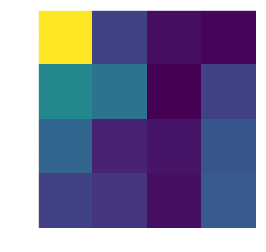

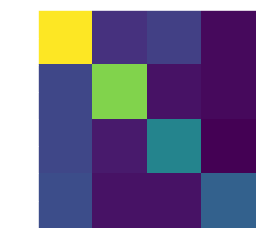

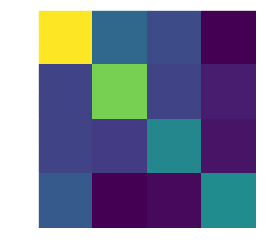

In [286]:
plt.figure()
plt.imshow(cm_lr)
plt.figure()
plt.imshow(cm_rfc)
plt.figure()
plt.imshow(cm_gbc)

In [287]:
featurized_data = []
labels = []
count = 0
for founder in baseline_founders:
    degree = list(degrees_lower).index(baseline_founders[founder]['degree'].lower())
    school = list(schools_lower).index(baseline_founders[founder]['school'].lower())
    num_founders = len(company_founders[baseline_founders[founder]['company']])
    curr_company = baseline_companies.index(baseline_founders[founder]['company'])
    num_unique_degrees = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_degree = company_founders[baseline_founders[founder]['company']][person]['degree']
            if curr_degree != [] and curr_degree.lower() != 'degree':
                if curr_degree not in num_unique_degrees:
                    num_unique_degrees.append(curr_degree)
    
    num_unique_majors = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_major = company_founders[baseline_founders[founder]['company']][person]['majors']
            if curr_major != []:
                if curr_major not in num_unique_majors:
                    num_unique_majors.append(curr_major)
                    
    num_unique_schools = []
    for i in range(num_founders):
        for person in company_founders[baseline_founders[founder]['company']]:
            curr_school = company_founders[baseline_founders[founder]['company']][person]['school']
            if curr_school != []:
                if curr_school not in num_unique_schools:
                    num_unique_schools.append(curr_school)

    labels.append(baseline_founders[founder]['revenue'])
    featurized_data.append([count,degree,school,num_founders,len(num_unique_degrees),\
                            len(num_unique_majors),len(num_unique_schools),curr_company])
    count += 1

In [288]:
median = np.median(labels)
sorted_labels = sorted(labels)
lower_median = np.median(sorted_labels[:int(len(sorted_labels)/2)])
upper_median = np.median(sorted_labels[int(len(sorted_labels)/2):])
for i in range(len(labels)):
    if labels[i] <= lower_median:
        labels[i] = 1
    elif labels[i] <= median and labels[i] > lower_median:
        labels[i] = 2
    elif labels[i] <= upper_median and labels[i] > median:
        labels[i] = 3
    else:
        labels[i] = 4

In [289]:
sorted_features = list(enumerate(sorted(featurized_data, key=lambda x: x[-1])))
indices = [x[0] for x in sorted_features]
sorted_labels = [labels[x] for x in indices]
sorted_features = [x[1:] for x in sorted_features]

grouped_features = []
grouped_labels = []

same_feature = []
same_label = []

curr_feature = 0
feature = 0
for i in range(len(sorted_features)):
    feature = sorted_features[i][0][-1]
    label = sorted_labels[i]
    if feature != curr_feature:
        grouped_features.append(same_feature)
        grouped_labels.append(same_label)
        same_feature = []
        same_label = []
    same_feature.append(sorted_features[i])
    same_label.append(sorted_labels[i])
    curr_feature = feature
    curr_label = label

In [290]:
grouped_features = np.array(grouped_features)
grouped_labels = np.array(grouped_labels)

In [294]:
lr_accuracies = []
rfc_accuracies = []
gbc_accuracies = []

for i in range(10):
    shuffled_indices = np.arange(0,len(grouped_features))
    np.random.shuffle(shuffled_indices)

    train_data = [grouped_features[i] for i in shuffled_indices[:int(len(shuffled_indices)*0.8)]]
    train_indices = np.array([item[0][0] for sublist in train_data for item in sublist])
    train_companies = np.array([item[0][-1] for sublist in train_data for item in sublist])
    train_data = np.array([item[0][1:] for sublist in train_data for item in sublist])

    test_data = [grouped_features[i] for i in shuffled_indices[int(len(shuffled_indices)*0.8):]]
    test_indices = np.array([item[0][0] for sublist in test_data for item in sublist])
    test_companies = np.array([item[0][-1] for sublist in test_data for item in sublist])
    test_data = np.array([item[0][1:] for sublist in test_data for item in sublist])

    train_labels = [grouped_labels[i] for i in shuffled_indices[:int(len(shuffled_indices)*0.8)]]
    train_labels = np.array([item for sublist in train_labels for item in sublist])

    test_labels = [grouped_labels[i] for i in shuffled_indices[int(len(shuffled_indices)*0.8):]]
    test_labels = np.array([item for sublist in test_labels for item in sublist])

    lr = LogisticRegression()
#     lr_probas = lr.fit(train_data, train_labels).predict_proba(test_data)
    lr_accuracies.append(lr.fit(train_data, train_labels).score(test_data,test_labels))

    rfc = RandomForestClassifier()
#     rfc_probas = rfc.fit(train_data, train_labels).predict_proba(test_data)
    rfc_accuracies.append(rfc.fit(train_data, train_labels).score(test_data,test_labels))

    gbc = GradientBoostingClassifier(max_depth=10, random_state=42)
#     gbc_probas = gbc.fit(train_data, train_labels).predict_proba(test_data)
    gbc_accuracies.append(gbc.fit(train_data, train_labels).score(test_data,test_labels))

#     curr_company = -1
#     probas = []
#     predictions = []
#     for i in range(len(test_data)):
#         if curr_company != test_companies[i] and i > 0:
#             num_results = len(probas)
#             probas = np.prod(np.array(probas), axis=0)
#             for j in range(num_results):
#                 predictions.append(np.argmax(probas)+1)
#             probas = []
#         probas.append(lr_probas[i])
#         curr_company = test_companies[i]
#     num_results = len(probas)
#     probas = np.prod(np.array(probas), axis=1)
#     for j in range(num_results):
#         predictions.append(np.argmax(probas)+1)
                          
#     lr_accuracies.append(np.mean(predictions == test_labels))

#     curr_company = -1
#     probas = []
#     predictions = []
#     for i in range(len(test_data)):
#         if curr_company != test_companies[i] and i > 0:
#             num_results = len(probas)
#             probas = np.prod(np.array(probas), axis=0)
#             for j in range(num_results):
#                 predictions.append(np.argmax(probas)+1)
#             probas = []
#         probas.append(rfc_probas[i])
#         curr_company = test_companies[i]
#     num_results = len(probas)
#     probas = np.prod(np.array(probas), axis=1)
#     for j in range(num_results):
#         predictions.append(np.argmax(probas)+1)
                          
#     rfc_accuracies.append(np.mean(predictions == test_labels))

#     curr_company = -1
#     probas = []
#     predictions = []
#     for i in range(len(test_data)):
#         if curr_company != test_companies[i] and i > 0:
#             num_results = len(probas)
#             probas = np.prod(np.array(probas), axis=0)
#             for j in range(num_results):
#                 predictions.append(np.argmax(probas)+1)
#             probas = []
#         probas.append(gbc_probas[i])
#         curr_company = test_companies[i]
#     num_results = len(probas)
#     probas = np.prod(np.array(probas), axis=1)
#     for j in range(num_results):
#         predictions.append(np.argmax(probas)+1)
                          
#     gbc_accuracies.append(np.mean(predictions == test_labels))

print(np.mean(lr_accuracies))
print(np.mean(rfc_accuracies))
print(np.mean(gbc_accuracies))

0.2789585000620182
0.31741239178663117
0.3559923098894937


In [296]:
lr_predictions = lr.fit(train_data, train_labels).predict(test_data)
rfc_predictions = rfc.fit(train_data, train_labels).predict(test_data)
gbc_predictions = gbc.fit(train_data, train_labels).predict(test_data)

In [297]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(test_labels, lr_predictions)
cm_rfc = confusion_matrix(test_labels, rfc_predictions)
cm_gbc = confusion_matrix(test_labels, gbc_predictions)

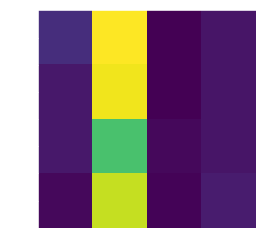

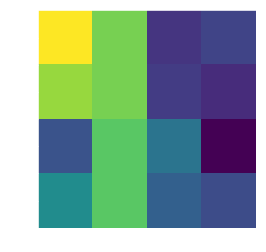

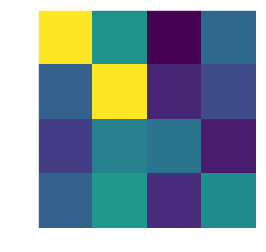

In [298]:
plt.figure()
plt.imshow(cm_lr)
plt.figure()
plt.imshow(cm_rfc)
plt.figure()
plt.imshow(cm_gbc)

In [295]:
len(train_labels), len(test_labels)

(1696, 427)

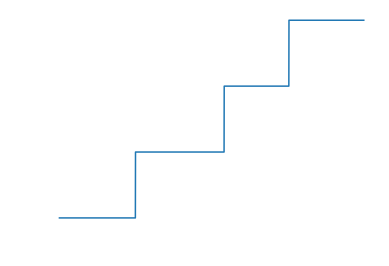

In [268]:
fig = plt.figure()

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

plt.plot(sorted(labels))
plt.xlabel('Datapoint #')
plt.ylabel('Label #')
fig.savefig('temp.png', transparent=True)
plt.show()

In [283]:
count1 = 0
count2 = 0
for label in labels:
    if label==1:
        count1 += 1
    elif label==2:
        count2 += 1

In [284]:
count1/len(labels)

0.2512147716229349